In [129]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
import json
from tqdm import tqdm, tqdm_notebook

%run ../Scripts/coverage.py
%run ../Scripts/fitness.py
%run ../Scripts/immunity.py
%run ../Scripts/initMethods.py
%run ../Scripts/supMethods.py
%run ../Scripts/mutation.py

In [140]:
params = { #parameters relevant for the equations
    "Nh":         1000000,
    "N0":          100000,
    "R0":              20,
    "M":                1, #Also L, total number of spacers
    "mu":            0.01, #mutation rate
    "gamma_shape":     20, 
    "Np":               0, #Number of Cas Protein
    "dc":               3, #Required number of complexes to activate defence
    "h":                4, #coordination coeff
    "r":             2000, #cross-reactivity kernel
}
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                   1000,
    "dx":                           1,
    "tf":                        1000,
    "dt":                           1,
    "initial_mean_n":           [0,0],
    "initial_mean_nh":          [0,0],
    "conv_size":                 4000,
    "num_threads":                 32,
    "tail_axis":               [1, 1],
}

In [141]:
params, sim_params = init_cond(params, sim_params)

Phage Population: 100000.0000| Uc: 7.7871| sigma: 2.4223
Phage Population: 529.5384| Uc: 3.0017| sigma: 1.9086
Phage Population: 328.7707| Uc: 2.3910| sigma: 1.8031
Phage Population: 293.4287| Uc: 2.2338| sigma: 1.7727
Phage Population: 283.6152| Uc: 2.1857| sigma: 1.7631
Phage Population: 280.5440| Uc: 2.1701| sigma: 1.7600
Phage Population: 279.5467| Uc: 2.1651| sigma: 1.7589
Phage Population: 279.2189| Uc: 2.1623| sigma: 1.7584


In [132]:
n = init_guassian(params["N"], sim_params, "n")
nh = init_exptail(params["Nh"], params, sim_params, "nh")
kernel_quarter = init_quarter_kernel(params, sim_params)

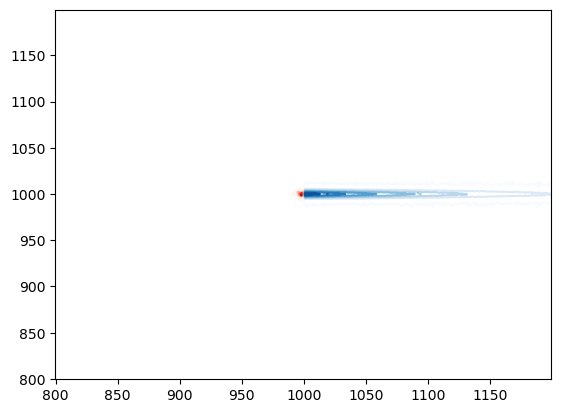

In [134]:
plt.figure()
plt.contour(n.todense(), cmap = "Reds")
plt.contour(nh.todense(), cmap = "Blues")
plt.margins(-0.4, -0.4)
plt.show()

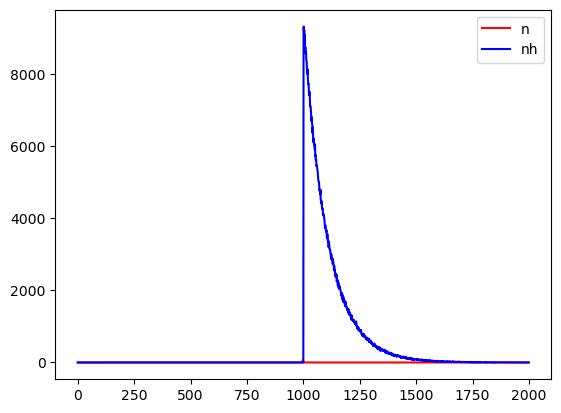

In [135]:
plt.figure()
# plt.plot(n.toarray().squeeze()[1000, 900:1100], color = "red", label = "n")
plt.plot(np.sum(n.toarray().squeeze(), axis = 0), color = "red", label = "n")
# plt.plot(nh.toarray().squeeze()[1000, 900:1100], color = "blue", label = "nh")
plt.plot(np.sum(nh.toarray().squeeze(), axis = 0), color = "blue", label = "nh")
# plt.xlim([25, 50])
plt.legend()

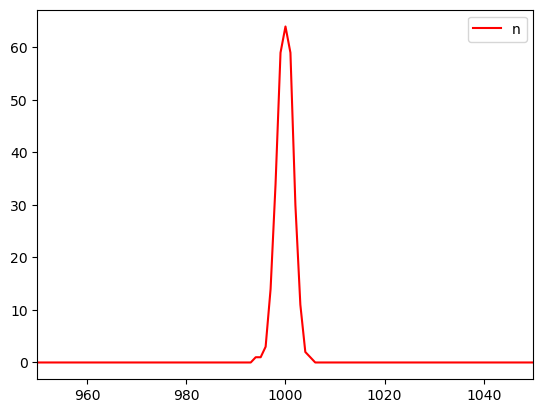

In [139]:
plt.figure()
# plt.plot(n.toarray().squeeze()[900:1100, 1000], color = "red", label = "n")
plt.plot(np.sum(n.toarray().squeeze(), axis = 1), color = "red", label = "n")
# plt.plot(nh.toarray().squeeze()[900:1100, 1000], color = "blue", label = "nh")
# plt.plot(np.sum(nh.toarray().squeeze(), axis = 1), color = "blue", label = "nh")
plt.xlim([950, 1050])
plt.legend()

In [27]:
sigma = sim_params["initial_var_n"]
v0 = params["v0"]
uc = params["uc"]
print(f"sigma: {sigma}")
print(f"v0: {v0}")
print(f"uc: {uc}")

sigma: 5.106516048506096
v0: 0.4954536169193563
uc: [0, 15.380594393387964]


In [28]:
D = params["D"]
r = params["r"]
M = params["M"]
R0 = params["R0"]
N0 = params["N0"]

A = np.power((D*r)/(M*(np.power(R0, 1/M)-1)), 1/3)
B = M*(np.power(R0, 1/M)-1)/r
B = N0*np.power(D, 1/3)*np.power(B, 2/3)
B = np.power(24*np.log(B), 1/6)
print(f"sigma check: {A*B}")

A = np.power(D, 2/3)
A = A*np.power((M*(np.power(R0, 1/M)-1))/r,1/3)
B = M*(np.power(R0, 1/M)-1)/r
B = N0*np.power(D, 1/3)*np.power(B, 2/3)
B = np.power(24*np.log(B), 1/3)
print(f"v0 check: {A*B}")

A = np.power(D, 2/3)
A = (1/4)*np.power((D*r)/(M*(np.power(R0, 1/M)-1)),1/3)
B = M*(np.power(R0, 1/M)-1)/r
B = N0*np.power(D, 1/3)*np.power(B, 2/3)
B = np.power(24*np.log(B), 2/3)
print(f"uc check: {A*B}")

sigma check: 5.106516048506096
v0 check: 0.4954536169193563
uc check: 15.380594393387975
